# Канатов Николай, 18иад

## Лабоаторная работа

## Данные для работы: https://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving

Данные: имеются характеристики для доказательства теоремы, а также имеется 5 эвристик, с помощью которых доказывается теорема. Задача состоит в следующем: учитывая характеристики, указать какая из 5 эвристик даст самое быстрое доказательство теоремы.

Столбцы с 1 по 14 являются статическими характеристиками и столбцы с 15 по 53 являются динамическими характеристиками. Последние пять столбцов обозначают время в секундах, взятое каждой из пяти эвристик, чтобы доказать соответствующую теорему. Был предел времени в 100 секунд. Запись -100 означает неспособность получить доказательство в течение срока.



Для данной задачи уже предоставленны файлы с тестовыми и обучающими данным. Однако интереснее работать с 'сырыми' данными, поэтому мы будем использовать файл со всеми объектами без предобработки.

Набор данных не имеет пропущенных значений.

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Чтение данных

In [130]:
data = pd.read_csv('all-data-raw.csv', sep = ',', header=None, engine = 'python')
data.columns = [u's1',u's2',u's3',u's4',u's5',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd21', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'r1', u'r2', u'r3', u'r4', u'r5']
data.shape

(6118, 58)

В приложении к датасету указано, что в нем имеется две ненужных характеристики, это статическая характеристика в столбце 's5' и динамическая характеристика в столбце 'd21', поэтому мы исключим их из нашего набора

In [131]:
data = data.drop(['s5','d21'], axis = 1)
data.shape

(6118, 56)

In [132]:
data.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d35,d36,d37,d38,d39,r1,r2,r3,r4,r5
0,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.73684,0.00188,0.73872,0.073308,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
1,0.83307,0.99682,0.83307,0.76948,0.77107,0.068363,0.16057,6,1.2734,6,...,0.74248,0.00188,0.74436,0.067669,0.18797,0.08,0.08,0.2,0.08,0.08
2,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.74060,0.00188,0.74248,0.069549,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
3,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.72932,0.00188,0.73120,0.080827,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
4,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.73120,0.00188,0.73308,0.078947,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00


In [133]:
data.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d35,d36,d37,d38,d39,r1,r2,r3,r4,r5
6113,0.008403,0.77311,0.058824,0.008403,0.025210,0.042017,0.93277,8,3.1597,4,...,0.017544,0.017544,0.087719,0.008772,0.90351,-100.0,-100.0,-100.0,-100.0,-100.0
6114,0.017391,0.77391,0.052174,0.017391,0.043478,0.043478,0.91304,8,3.0783,4,...,0.018349,0.018349,0.091743,0.000000,0.90826,-100.0,-100.0,-100.0,-100.0,-100.0
6115,0.026786,0.79464,0.026786,0.017857,0.035714,0.044643,0.91964,8,3.0268,4,...,0.017391,0.017391,0.086957,0.000000,0.91304,-100.0,-100.0,-100.0,-100.0,-100.0
6116,0.017857,0.79464,0.017857,0.008929,0.026786,0.044643,0.92857,8,3.0357,4,...,0.017241,0.017241,0.086207,0.000000,0.91379,-100.0,-100.0,-100.0,-100.0,-100.0
6117,0.076923,0.69231,0.076923,0.038462,0.153850,0.076923,0.76923,5,2.7692,4,...,0.000000,0.000000,0.000000,0.000000,1.00000,-100.0,-100.0,-100.0,-100.0,-100.0


## Первичная обработка

Нашей задачей является определении подходящей эвристики, на данный момент эту информацию мы можем получить из пяти последних столбцов. Намного проще работать с одним признаком, чем с пятью, поэтому добавим столбец, в котором будем хранить информацию о номере наиболее подходящей эвристики. А затем удалим пять столбцов, где записано время в секундах, поскольку с ними в дальнейшем работать уже не будем.
Если ни одна из эвристик не будет подходить для набора признаков, то в соответствующую ячейку запишим "0".

In [134]:
def getH(lst):
    min=1000
    index=-1
    for i in range(0,len(lst)):
        if lst[i]<min and lst[i]!=-100:
            min=lst[i]
            index=i
    return index+1

In [136]:
data['H']=0
for i in range(0,len(data)):
    data['H'][i]=getH([data.r1[i],data.r2[i],data.r3[i],data.r4[i],data.r5[i]])

D:\Anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
data = data.drop(['r1','r2','r3','r4','r5'], axis = 1)
table = data
data.shape

(6118, 52)

In [138]:
data.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.73684,0.00188,0.73872,0.073308,0.18797,0
1,0.83307,0.99682,0.83307,0.76948,0.77107,0.068363,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.74248,0.00188,0.74436,0.067669,0.18797,1
2,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.74060,0.00188,0.74248,0.069549,0.18797,0
3,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.72932,0.00188,0.73120,0.080827,0.18797,0
4,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.73120,0.00188,0.73308,0.078947,0.18797,0


In [139]:
data.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
6113,0.008403,0.77311,0.058824,0.008403,0.025210,0.042017,0.93277,8,3.1597,4,...,0.00000,0.017544,0.47368,0.017544,0.017544,0.017544,0.087719,0.008772,0.90351,0
6114,0.017391,0.77391,0.052174,0.017391,0.043478,0.043478,0.91304,8,3.0783,4,...,0.00000,0.018349,0.44037,0.018349,0.018349,0.018349,0.091743,0.000000,0.90826,0
6115,0.026786,0.79464,0.026786,0.017857,0.035714,0.044643,0.91964,8,3.0268,4,...,0.00000,0.017391,0.41739,0.017391,0.017391,0.017391,0.086957,0.000000,0.91304,0
6116,0.017857,0.79464,0.017857,0.008929,0.026786,0.044643,0.92857,8,3.0357,4,...,0.00000,0.017241,0.40517,0.017241,0.017241,0.017241,0.086207,0.000000,0.91379,0
6117,0.076923,0.69231,0.076923,0.038462,0.153850,0.076923,0.76923,5,2.7692,4,...,0.31313,0.000000,0.75806,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0


In [140]:
data.describe()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,...,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000
mean,0.367852,0.830860,0.264259,0.300741,0.357758,0.106189,0.536053,7.081399,2.640024,7.725727,...,0.015670,0.192655,0.699686,0.134589,0.182576,0.127697,0.270410,0.046002,0.683588,1.617032
std,0.313888,0.213030,0.268266,0.263988,0.269641,0.119298,0.302384,7.303454,2.274133,7.396474,...,0.145052,0.333571,0.297221,0.250727,0.328448,0.261721,0.321667,0.100175,0.320924,1.773495
min,0.000000,0.007812,0.000000,0.000000,0.000382,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.114572,0.769408,0.101690,0.100000,0.144055,0.031915,0.250000,4.000000,1.811000,3.000000,...,0.000000,0.000000,0.546150,0.000000,0.000000,0.000000,0.046190,0.000000,0.569107,0.000000
50%,0.235290,0.911770,0.136840,0.200000,0.250895,0.069952,0.645390,5.000000,2.193600,5.000000,...,0.000000,0.025641,0.719010,0.031084,0.018868,0.014286,0.131235,0.015873,0.803685,1.000000
75%,0.593355,1.000000,0.333330,0.483870,0.500000,0.116280,0.766420,10.000000,3.034500,7.000000,...,0.020202,0.152410,1.000000,0.096898,0.126253,0.067104,0.324315,0.055118,0.910570,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.982140,0.996600,244.000000,39.070000,86.000000,...,7.888900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


В нашем случае векторизация не является необходимой, так как все признаки являются числовыми.

In [141]:
data.count(axis=0)

s1     6118
s2     6118
s3     6118
s4     6118
s6     6118
s7     6118
s8     6118
s9     6118
s10    6118
s11    6118
s12    6118
s13    6118
s14    6118
d1     6118
d2     6118
d3     6118
d4     6118
d5     6118
d6     6118
d7     6118
d8     6118
d9     6118
d10    6118
d11    6118
d12    6118
d13    6118
d14    6118
d15    6118
d16    6118
d17    6118
d18    6118
d19    6118
d20    6118
d22    6118
d23    6118
d24    6118
d25    6118
d26    6118
d27    6118
d28    6118
d29    6118
d30    6118
d31    6118
d32    6118
d33    6118
d34    6118
d35    6118
d36    6118
d37    6118
d38    6118
d39    6118
H      6118
dtype: int64

In [142]:
corrTable = data.corr()
corrTable

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
s1,1.000000,0.560917,0.155728,0.944824,0.764236,0.392727,-0.836423,-0.346052,-0.423964,-0.096020,...,-0.053085,0.761732,0.533602,-0.058304,0.753992,0.646790,0.631376,-0.093491,-0.603656,-0.051288
s2,0.560917,1.000000,-0.243085,0.553305,0.130169,0.159898,-0.179159,-0.335576,-0.312079,0.228600,...,-0.080934,0.358444,0.772265,-0.348883,0.356206,0.302235,0.115757,-0.055164,-0.098806,-0.067283
s3,0.155728,-0.243085,1.000000,0.073748,0.317164,0.372467,-0.429768,0.214845,-0.043721,-0.231214,...,-0.048571,0.167439,-0.192574,0.838963,0.152924,-0.014453,0.248503,0.242087,-0.324644,0.012292
s4,0.944824,0.553305,0.073748,1.000000,0.821001,0.144898,-0.789268,-0.328135,-0.414262,-0.052904,...,-0.050641,0.746017,0.564710,-0.075621,0.747585,0.627144,0.623199,-0.124496,-0.585781,-0.056761
s6,0.764236,0.130169,0.317164,0.821001,1.000000,0.069910,-0.919299,-0.210448,-0.408609,-0.119686,...,-0.049008,0.641810,0.246135,0.170750,0.642325,0.540804,0.715226,-0.147149,-0.670951,-0.020025
s7,0.392727,0.159898,0.372467,0.144898,0.069910,1.000000,-0.456864,-0.113029,-0.095786,-0.214923,...,-0.030679,0.357712,0.047048,0.112409,0.334814,0.345181,0.300548,0.275055,-0.387101,0.006412
s8,-0.836423,-0.179159,-0.429768,-0.789268,-0.919299,-0.456864,1.000000,0.232254,0.402155,0.191518,...,0.055805,-0.713440,-0.238046,-0.196609,-0.704866,-0.618428,-0.756354,0.022701,0.751019,0.015327
s9,-0.346052,-0.335576,0.214845,-0.328135,-0.210448,-0.113029,0.232254,1.000000,0.613235,-0.159940,...,-0.002683,-0.244335,-0.277654,0.281398,-0.253691,-0.272830,-0.206719,0.115337,0.171196,0.042063
s10,-0.423964,-0.312079,-0.043721,-0.414262,-0.408609,-0.095786,0.402155,0.613235,1.000000,-0.155441,...,0.019333,-0.291564,-0.266843,0.074737,-0.293908,-0.252475,-0.294991,0.077843,0.271376,0.030478
s11,-0.096020,0.228600,-0.231214,-0.052904,-0.119686,-0.214923,0.191518,-0.159940,-0.155441,1.000000,...,0.005974,-0.113948,0.154421,-0.144126,-0.107592,-0.100955,-0.139668,-0.147413,0.186007,-0.202562


In [143]:
corField = []
for i in corrTable:
    for j in corrTable.index[corrTable[i] > 0.9]:
        if ((i != j) and (j not in corField) and (i not in corField)):
            corField.append(j)
            print(i,j, corrTable[i][corrTable.index==j].values[0])

s1 s4 0.9448239827698052
d1 d19 1.0
d4 d25 0.9041171376669671
d4 d27 0.9440956976120498
d4 d29 0.9055857530118522
d20 d31 0.9957256059612296
d32 d35 0.99029122385487


Мы получили столбцы которые сильно коррелируют, таким образом, можем их исключить из наших данных

In [144]:
data = data.drop(['s4','d19','d4','d31','d25','d35'],axis=1)

In [145]:
corrTable = data.corr()
corField = []
for i in corrTable:
    for j in corrTable.index[corrTable[i] > 0.9]:
        if ((i != j) and (j not in corField) and (i not in corField)):
            corField.append(j)
            print(i,j, corrTable[i][corrTable.index==j].values[0])

d27 d29 0.9815138009237779


In [146]:
data = data.drop(['d27'],axis=1)
table = data

Избавимся от объектов-дубликатов, если такие имеются, т.к. дубликаты сильно повлияют на качество обучения моделей.

In [147]:
data = data.drop_duplicates(subset=table.columns.values, keep=False)
data.shape

(5270, 45)

Всего было 6118 объектов, а осталось только 5270 уникальных.

In [148]:
y = data['H']
print('Number of instanse: %d' % len(y))
print(y)

Number of instanse: 5270
0       0
1       1
2       0
3       0
4       0
5       0
6       0
11      1
12      1
13      3
23      0
24      0
25      4
26      2
27      0
28      5
29      1
31      1
32      5
33      2
34      2
35      2
36      1
37      0
38      3
40      1
41      3
42      0
43      0
44      0
       ..
6088    1
6089    3
6090    1
6091    1
6092    1
6093    4
6094    1
6095    3
6096    4
6097    5
6098    1
6099    5
6100    1
6101    0
6102    0
6103    0
6104    0
6105    0
6106    0
6107    3
6108    0
6109    0
6110    0
6111    0
6112    0
6113    0
6114    0
6115    0
6116    0
6117    0
Name: H, Length: 5270, dtype: int64


### Нормализуем данные

In [149]:
data = data.drop('H',axis = 1)
data = (data - data.mean(axis = 0))/data.std(axis = 0)

In [150]:
data.describe()

,s1,s2,s3,s6,s7,s8,s9,s10,s11,s12,...,d28,d29,d30,d32,d33,d34,d36,d37,d38,d39
count,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,...,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03
mean,3.489050e-15,-8.034265e-16,-3.144543e-15,-4.706082e-15,-9.184157e-15,-1.379356e-14,-7.753233e-16,1.722961e-14,9.541809e-16,-4.901266e-15,...,-2.070998e-15,-3.293275e-15,4.159018e-16,-2.216296e-15,1.786336e-14,-2.399219e-15,-2.159331e-15,-6.136352e-15,1.775514e-16,4.593205e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.169564e+00,-3.727579e+00,-1.005016e+00,-1.318486e+00,-8.949139e-01,-1.729732e+00,-7.974464e-01,-6.969531e-01,-8.968970e-01,-1.840839e+00,...,-2.863573e-01,-4.208455e-01,-1.712038e-01,-5.809862e-01,-2.281811e+00,-5.366667e-01,-5.060809e-01,-8.402027e-01,-4.693513e-01,-2.103732e+00
25%,-8.264677e-01,-2.970182e-01,-6.246184e-01,-7.967389e-01,-6.345824e-01,-9.139300e-01,-4.063546e-01,-3.774738e-01,-6.151213e-01,-6.606158e-01,...,-2.863573e-01,-3.716840e-01,-1.712038e-01,-5.809862e-01,-5.170306e-01,-5.366667e-01,-5.060809e-01,-7.028862e-01,-4.693513e-01,-3.712296e-01
50%,-4.029400e-01,3.814762e-01,-4.839364e-01,-3.646983e-01,-3.278074e-01,3.505627e-01,-2.759906e-01,-2.035346e-01,-3.333455e-01,-4.536970e-01,...,-2.863573e-01,-2.643272e-01,-1.712038e-01,-4.981654e-01,8.606438e-02,-4.158560e-01,-4.516786e-01,-4.390618e-01,-3.203359e-01,3.709671e-01
75%,7.439090e-01,7.861072e-01,2.439789e-01,5.188554e-01,1.127093e-01,7.712553e-01,3.758291e-01,1.442202e-01,-5.156977e-02,8.146898e-01,...,-7.002947e-02,-9.578050e-02,-1.712038e-01,-9.029403e-02,1.002662e+00,-1.320469e-01,-2.159389e-01,2.060193e-01,8.928693e-02,7.077795e-01
max,1.996406e+00,7.861072e-01,2.742006e+00,2.357600e+00,7.022103e+00,1.522380e+00,3.088099e+01,1.499467e+01,1.107857e+01,8.781276e+00,...,2.945899e+01,1.375301e+01,3.084594e+01,2.400540e+00,1.002662e+00,3.540641e+00,3.193248e+00,2.235677e+00,9.961517e+00,9.816199e-01


In [151]:
X = data

### Разделение на тестовую и обучающую выборки

25% тестовая выборка, 75% обучающая выборка

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 72)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3952 1318


In [26]:
# дополнительно проведем скользящую проверку для каждой модели
from sklearn import cross_validation
score_check = {}
kfold = 5

# словарь в который запишем результат точности, каждого алгоритма
score = {}

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

train_error = np.mean(y_train != train_predict)
test_error  = np.mean(y_test  != test_predict)
print(train_error, test_error)

0.014676113360323886 0.49165402124430957


### Подбор параметра k ближайших соседей

In [28]:
from sklearn.grid_search import GridSearchCV
neighbors = [i for i in range(1,30)]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_neighbors)

D:\Anaconda python\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.47115384615384615 7


In [29]:
knn = KNeighborsClassifier(n_neighbors = best_neighbors).fit(X_train, y_train)

train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

train_error = np.mean(y_train != train_predict)
test_error  = np.mean(y_test  != test_predict)

print(train_error, test_error)

0.3709514170040486 0.4559939301972686


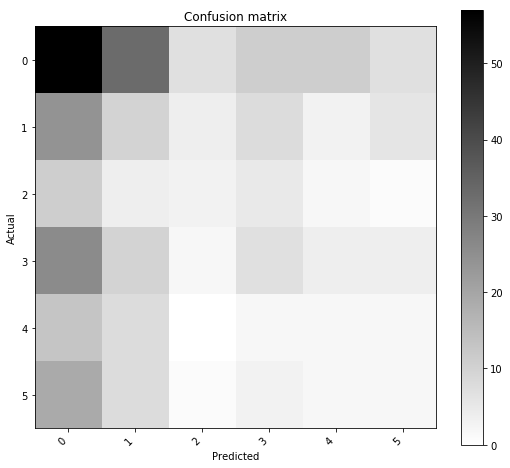

In [30]:
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(y_test, test_predict)
cm.plot()

In [31]:
cm.print_stats()

D:\Anaconda python\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted    0   1   2   3   4   5  __all__
Actual                                     
0           57  33   7  11  11   7      126
1           24  10   4   8   3   6       55
2           11   4   3   5   2   1       26
3           26  10   2   7   4   4       53
4           13   8   0   2   2   2       27
5           19   8   1   3   2   2       35
__all__    150  73  17  36  24  22      322


Overall Statistics:

Accuracy: 0.2515527950310559
95% CI: (0.20508528426869768, 0.30265604750841824)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999999999992
Kappa: -0.007805093440344961
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0          1          2  \
Population                                   322        322        322   
P: Condition positive                        126         55         26   
N: Condition negative                        196        267        296   
Test outcome positive                    

In [32]:
score['knn'] = 1 - test_error

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predict, target_names = ['class 0','class 1','class 2','class 3','class 4','class 5']))

             precision    recall  f1-score   support

    class 0       0.68      0.83      0.75       541
    class 1       0.41      0.48      0.45       225
    class 2       0.38      0.25      0.30       114
    class 3       0.44      0.43      0.43       164
    class 4       0.36      0.22      0.27       144
    class 5       0.39      0.21      0.27       130

avg / total       0.51      0.54      0.52      1318



Стоит отметить, что модель knn достаточно хорошо умеет предсказываеть какие объекты принадлежат классу '0' по сравнению с остальными классами.

## SVC

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

train_error = np.mean(y_train != svc.predict(X_train))
test_error  = np.mean(y_test  != svc.predict(X_test))

print(train_error, test_error)

0.465080971659919 0.4802731411229135


### Подбор параметров 

In [35]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.4714068825910931 10.0


In [36]:
svc = SVC(C = best_C).fit(X_train, y_train)

train_error = np.mean(y_train != svc.predict(X_train))
test_error  = np.mean(y_test  != svc.predict(X_test))

print(train_error, test_error)

0.3674089068825911 0.44840667678300455


In [37]:
score['svc'] = 1-test_error

# Random Forest

In [38]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

train_error = np.mean(y_train != rf.predict(X_train))
test_error  = np.mean(y_test  != rf.predict(X_test))

print(train_error, test_error)

0.014676113360323886 0.4317147192716237


In [39]:
score['RandomForest'] = 1-test_error

### Значимость признаков

In [40]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("feature sum: %d " % sum(importances))
print("Feature ranking:")

for f in range(len(X.columns)):
    print("%2d. feature '%5s' (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))   

feature sum: 0 
Feature ranking:
 1. feature '   d2' (0.044439)
 2. feature '  s14' (0.039790)
 3. feature '  d16' (0.037495)
 4. feature '  d14' (0.036812)
 5. feature '  s12' (0.036098)
 6. feature '  d12' (0.035290)
 7. feature '  d26' (0.035081)
 8. feature '  d10' (0.033620)
 9. feature '  d29' (0.032850)
10. feature '   d3' (0.032430)
11. feature '   d6' (0.032097)
12. feature '   s7' (0.029497)
13. feature '   d8' (0.029003)
14. feature '   s3' (0.027986)
15. feature '  d33' (0.026492)
16. feature '   s6' (0.025245)
17. feature '  s13' (0.024731)
18. feature '  d37' (0.024387)
19. feature '  d34' (0.024362)
20. feature '  d39' (0.023682)
21. feature '   s2' (0.022566)
22. feature '  s10' (0.022473)
23. feature '  d36' (0.021861)
24. feature '  d38' (0.021453)
25. feature '   d1' (0.021384)
26. feature '   s8' (0.021241)
27. feature '   s1' (0.021161)
28. feature '  d18' (0.020541)
29. feature '  d32' (0.019594)
30. feature '  d13' (0.018472)
31. feature '  d15' (0.016838)
32. fe

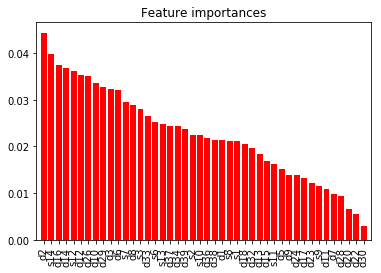

In [41]:
plt.clf()
size = len(X.columns)
plt.title("Feature importances")
plt.bar(range(size), importances[indices[:size]], align = 'center', color = 'r')
plt.xticks(range(size), X.columns[indices[:size]], rotation = 90)
plt.xlim([-1, size])
plt.show()

Значимость наших признаков не сильно отличается друг от друга, поэтому можем предположить, что даже удалив из данных первые 10 значимых признаков, наша модель не сильно ухудшиится.

In [42]:
new_X_train = X_train.drop(X_train.columns[indices[:10]],axis = 1)
new_X_test = X_test.drop(X_train.columns[indices[:10]],axis = 1)
rf_2 = ensemble.RandomForestClassifier(n_estimators = 1000)
rf_2.fit(new_X_train, y_train)

train_error = np.mean(y_train != rf_2.predict(new_X_train))
test_error  = np.mean(y_test  != rf_2.predict(new_X_test))

print(train_error, test_error)

0.03314777327935223 0.4332321699544765


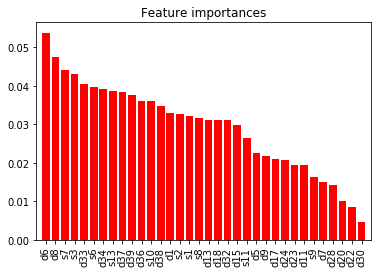

feature sum: 1.000000 


In [43]:
importances = rf_2.feature_importances_
indices = np.argsort(importances)[::-1]
plt.clf()
size = len(new_X_train.columns)
plt.title("Feature importances")
plt.bar(range(size), importances[indices[:size]], align = 'center', color = 'r')
plt.xticks(range(size), new_X_train.columns[indices[:size]], rotation = 90)
plt.xlim([-1, size])
plt.show()
print("feature sum: %f " % sum(importances))

Как мы и предположили, точность нашей модели действительно сильно не ухудшилась. Ошибка на тестовой выборке увеличилась только на < 4%, а на тестовой выборке увеличилась на < 1% 

# Extremely Randomized Trees

In [44]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

train_error = np.mean(y_train != ert.predict(X_train))
test_error  = np.mean(y_test  != ert.predict(X_test))

print(train_error, test_error)

0.014676113360323886 0.44385432473444614


In [45]:
score['ExtremelyRandomizedTrees'] = 1-test_error

# AdaBoost

In [46]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

train_error = np.mean(y_train != ada.predict(X_train))
test_error = np.mean(y_test != ada.predict(X_test))

print(train_error, test_error)

0.5020242914979757 0.5758725341426404


In [47]:
score['AdaBoost'] = 1-test_error

# GBT

In [48]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

train_error = np.mean(y_train != gbt.predict(X_train))
test_error = np.mean(y_test != gbt.predict(X_test))

print(train_error, test_error)

0.016700404858299597 0.45295902883156297


In [49]:
score['Gbt'] = 1-test_error

# Выводы

### Точность построенных моделей

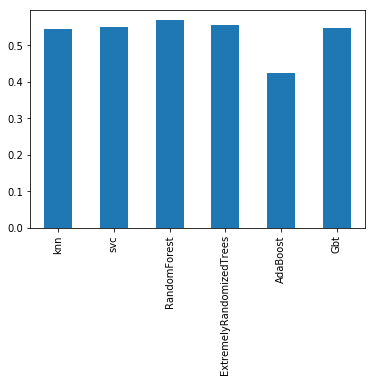

In [50]:
from pandas import DataFrame
DataFrame.from_dict(data = score, orient='index').plot(kind='bar', legend=False)
plt.show()

Как можем заметить из графика, наибольшую точность показали алгоритмы Random Forest и Extremely Randomized Trees.

Хотя, если сделать подбор параметров для каждой модели, то возможно мы сможем получить ещё большую точность.

Но какой из них лучше? На этот вопрос мы сможем ответить, получив более независимые результаты получения после кросс-валидации, т.к. эти результаты будут получены на независимой выборке.

### Результаты кросс-валидации

In [51]:
score_check['knn'] = cross_validation.cross_val_score(knn, X, y, cv = kfold).mean()
score_check['svc'] = cross_validation.cross_val_score(svc, X, y, cv = kfold).mean()
score_check['RandomForest'] = cross_validation.cross_val_score(rf, X, y, cv = kfold).mean()
score_check['ExtremelyRandomizedTrees'] = cross_validation.cross_val_score(ert, X, y, cv = kfold).mean()
score_check['AdaBoost'] = cross_validation.cross_val_score(ada, X, y, cv = kfold).mean()
score_check['Gbt'] = cross_validation.cross_val_score(gbt, X, y, cv = kfold).mean()

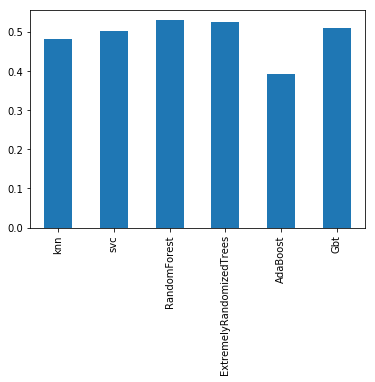

In [52]:
DataFrame.from_dict(data = score_check, orient='index').plot(kind='bar', legend=False)
plt.show()

На данном графике изображено значение точности каждой из модели на независимом наборе данных, полученные с помощью скользящего контроля. Для этого была использована функция  cross_val_score модуля cross_validation. 

Как видно из графика, лучше всего с поставленной задачей справилась модель построенная с помощью случайного леса, показав немного  большую точность, чем модели, обученные с помощью алгоритмов рандоминизированных деревьев и градиетного бустинга.
Хуже всего справилась модель AdaBoost.

In [53]:
print(score_check['RandomForest'], score_check['ExtremelyRandomizedTrees'], score_check['Gbt'])

0.5288555078830729 0.5252442484425498 0.5108312583901097


Результаты кросс-валидации говорят нам о том, что модель построенная с помощью Random Forest оказалась самой точной. Таким образом, мы можем использовать эту модель на готовых тестовых данных, предоставленных в задаче, заведомо зная, что она покажет лучший результат по сравнению с остальными моделями.

Довольно большой процент ошибки в каждой из моделей можно объяснить тем, что предоставленных данных оказалось недостаточно, или же они оказались протеворечивыми (признаки могли быть практически одинаковыми, незначительно отличающимися друг от друга, однако по данным признакам разные эвристики показали наилучший результат)

Опробуем построенную модель Random Forest на файле test.csv. В этом файле уже предоставлены готовые тестовые данные.

In [54]:
data_test = pd.read_csv('test.csv', sep = ',', header=None, engine = 'python')
data_test.shape

(1530, 57)

In [55]:
data_test.columns = [u's1',u's2',u's3',u's4',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'h1', u'h2', u'h3', u'h4', u'h5',u'h6']

Данные уже представленны без 2-х признаков, о которох было сказано в самом начале работы.


Для объекта, если не определена наилучшая эвристика, то в последнем столбце стоит 1, в противном случае, стоит -1. Последние пять столбцов с конца, не считая самый последний столбец, отвечают за одну из пяти эвристик. Соотвественно, если одна из них определена как лучшая, то записана 1, иначе -1.

Пример, где ни одна из эвристик не определена:

In [56]:
data_test[4:5]

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.02981,-0.36924,...,-0.36529,-0.30419,0.98631,0.004927,-1,-1,-1,-1,-1,1


Пример, где лучший результат показала 4-ая эвристика:

In [57]:
data_test[3:4]

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
3,-0.68993,-0.29367,-0.57052,-0.65296,-0.84061,-0.33245,0.87885,0.26323,0.42516,-0.50533,...,-0.4899,0.22958,0.70488,-0.44661,-1,-1,-1,1,-1,-1


Заменим последние 6 столбцов на 1, в котором укажем номер самой лучшей эвристики, если такой не будет, то запишем 0.

In [58]:
def getH(lst):
    index=-1
    for i in range(0,len(lst)):
        if lst[i] == 1:
            index=i+1
    if(index==6):
        return 0
    return index

In [59]:
data_test['H']=0
for i in range(0,len(data_test)):
    data_test['H'][i]=getH([data_test.h1[i],data_test.h2[i],data_test.h3[i],data_test.h4[i],data_test.h5[i],data_test.h6[i]])

D:\Anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
data_test = data_test.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_test.shape

(1530, 52)

In [61]:
data_test.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,-0.715880,-3.00440,2.117800,-0.601430,2.215900,-0.537990,-1.763800,0.263230,-0.213340,-0.64141,...,-0.11229,-0.53451,-2.27430,2.07240,-0.51227,-0.43436,1.008800,-0.46486,-0.873860,3
1,-0.397340,-0.21463,-0.476530,-0.559270,0.070425,0.614320,-0.302890,-0.417770,-0.071453,-0.64141,...,0.30551,-0.57834,-1.59760,-0.54541,-0.55678,-0.48990,0.052101,0.28711,-0.140210,1
2,2.009400,0.83152,-0.570520,2.232600,1.965400,0.032973,-1.763800,-0.826370,-0.709950,-0.64141,...,-0.11229,2.41110,0.99018,-0.54541,2.47930,3.07240,2.257900,-0.46486,-2.131800,1
3,-0.689930,-0.29367,-0.570520,-0.652960,-0.840610,-0.332450,0.878850,0.263230,0.425160,-0.50533,...,0.09661,-0.57834,-0.42393,-0.54541,-0.55678,-0.48990,0.229580,0.70488,-0.446610,4
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.029810,-0.36924,...,-0.11229,-0.44067,-0.43881,-0.51908,-0.45691,-0.36529,-0.304190,0.98631,0.004927,0


In [62]:
data_test.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
1525,2.009400,0.83152,-0.64572,2.30750,2.038300,-0.13313,-1.763800,-0.82637,-0.70995,0.31119,...,-0.11229,2.41110,0.990180,-0.54541,2.47930,2.62900,2.25790,-0.46486,-2.13180,0
1526,0.062779,-0.70283,1.23150,0.28188,0.089949,-0.73375,0.206700,0.67183,0.12618,0.17510,...,-0.11229,0.68241,0.075317,1.42130,0.69724,0.89358,0.55147,-0.33409,-0.45327,0
1527,0.253910,0.66413,-0.10430,0.41880,0.201620,-0.58160,0.047736,-0.28157,-0.22237,-0.09707,...,-0.11229,-0.50266,0.990180,-0.44407,-0.47992,-0.39400,-0.70757,-0.33795,0.81584,5
1528,1.230800,0.83152,-0.51883,1.25350,1.013300,0.14717,-0.960320,-0.55397,-0.55033,0.71944,...,-0.11229,-0.53624,0.990180,-0.54541,-0.51402,-0.43655,-0.74174,-0.46486,0.88904,0
1529,2.009400,0.83152,-0.75147,2.41290,2.140800,-0.36670,-1.763800,-0.82637,-0.70995,-0.64141,...,-0.11229,2.41110,0.990180,-0.54541,2.47930,2.66320,2.25790,-0.46486,-2.13180,3


Поскольку данные, считаются уже предобработанными, то ничего с ними делать не будем и сразу запустим нашу модель Random Forest. 

На данный момент мы имеем набор объектов с 52 признаками. Однако, все наши модели были обучены для объектов с 44 характеристиками, т.к. мы отбросили часть характеристик сильно коррелирующих друг с другом. Поэтому, нам придется проделать с этими данными то же самое (Удалить характеристики, которые были исключены ранее).

In [63]:
data_test = data_test.drop(['s4','d19','d4','d31','d25','d35','d27'],axis=1)

In [64]:
real_class = data_test['H']
data_test = data_test.drop(['H'],axis=1)

In [65]:
data_test.shape

(1530, 44)

In [66]:
error  = np.mean(real_class  != rf.predict(data_test))
error

0.2954248366013072

Как мы видим, на подготовленной тестовой выборке, мы получили меньшую ошибку.

#### Предположение

Можно предположить, что если мы бы обучали наши модели на уже подготовленных данных для обучающей выборки, предоставленной в задаче, то мы бы добились большей точности. 

Проверим наше предположение, построив модель с помощью алгоритма Random Forest.

#### Проверка предположения 

Данные, находящиеся в файлах train.csv, test.csv, validation.csv уже предобработаны, поэтому мы не будем их никак обрабатывать, за исключением замены последних 6 столбцов (где в одном из них записана 1, обозначающая лучшую эвристику, а в остальных -1) на 1, в который будем записывать номер лучшей эвристики.

In [67]:
column_names = [u's1',u's2',u's3',u's4',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'h1', u'h2', u'h3', u'h4', u'h5',u'h6']
data_train = pd.read_csv('train.csv', sep = ',', header=None, engine = 'python')
data_train.columns = column_names

data_test = pd.read_csv('test.csv', sep = ',', header=None, engine = 'python')
data_test.columns = column_names
print(data_train.shape)
print(data_test.shape)


(3059, 57)
(1530, 57)


Обычно, validaton data используется для настройки гиперпараметров моделей, и эти данные не фигурируют в обучении модели. Найдем оптимальные параметры для knn и random forest.

In [68]:
data_validation = pd.read_csv('validation.csv', sep = ',', header=None, engine = 'python')
data_validation.columns = column_names

data_for_getting_parametrs = pd.concat([data_train, data_validation])
data_for_getting_parametrs.shape

(4588, 57)

In [69]:
data_for_getting_parametrs

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
0,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.463000,0.270150,-1.555900,-1,-1,-1,-1,-1,1
1,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.480100,0.213610,-1.555900,1,-1,-1,-1,-1,-1
2,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.474400,0.232450,-1.555900,-1,-1,-1,-1,-1,1
3,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1
4,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.445800,0.326690,-1.555900,-1,-1,-1,-1,-1,1
5,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.463000,0.270150,-1.555900,-1,-1,-1,-1,-1,1
6,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.474400,0.232450,-1.555900,-1,-1,-1,-1,-1,1
7,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1
8,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1
9,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1


In [70]:
data_train['H']=0
for i in range(0,len(data_train)):
    data_train['H'][i]=getH([data_train.h1[i],data_train.h2[i],data_train.h3[i],data_train.h4[i],data_train.h5[i],data_train.h6[i]])
data_train = data_train.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_train.shape

D:\Anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(3059, 52)

In [71]:
data_for_getting_parametrs['H']=0
for i in range(0,len(data_for_getting_parametrs)):
    data_for_getting_parametrs['H'][i]=getH([int(data_for_getting_parametrs.h1[i:i+1]),int(data_for_getting_parametrs.h2[i:i+1]),int(data_for_getting_parametrs.h3[i:i+1]),int(data_for_getting_parametrs.h4[i:i+1]),int(data_for_getting_parametrs.h5[i:i+1]),int(data_for_getting_parametrs.h6[i:i+1])])
data_for_getting_parametrs = data_for_getting_parametrs.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_for_getting_parametrs.shape

D:\Anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(4588, 52)

In [72]:
data_for_getting_parametrs.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6803,-0.48278,1.4630,0.27015,-1.5559,0
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6974,-0.48278,1.4801,0.21361,-1.5559,1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6917,-0.48278,1.4744,0.23245,-1.5559,0
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6575,-0.48278,1.4401,0.34553,-1.5559,0
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6632,-0.48278,1.4458,0.32669,-1.5559,0


In [73]:
data_for_getting_parametrs.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
1524,1.38650,0.83152,-0.23966,1.16080,0.92316,0.763810,-1.12100,-0.55397,-0.539690,-0.23316,...,-0.112290,-0.36328,0.99018,-0.54541,-0.33836,-0.21738,-0.56571,-0.46486,0.71176,0
1525,-0.50624,-0.58481,-0.33987,-0.49442,-0.40892,-0.090004,0.39949,0.67183,0.059521,-0.64141,...,0.305510,-0.57834,-1.34880,-0.54541,-0.55678,-0.48990,-0.53790,-0.46486,0.68376,0
1526,-0.59253,0.73765,-0.62354,-0.56530,-0.73434,-0.599120,0.88843,-0.41777,-0.334510,-0.23316,...,-0.112290,-0.28034,0.91559,-0.43858,-0.33992,-0.48990,-0.54816,-0.13433,0.59309,0
1527,-0.51839,0.43125,-0.49860,-0.39309,-0.48333,-0.642260,0.68166,-0.28157,-0.204090,2.35250,...,0.026975,-0.43072,0.34074,-0.19947,-0.40686,-0.34960,-0.37141,-0.27919,0.45935,0
1528,-0.43252,0.16421,2.73810,-0.94444,-0.60105,2.379000,-0.39452,1.76140,2.810000,-0.50533,...,-0.112290,-0.12816,0.42741,3.45760,-0.50028,-0.47708,-0.22345,3.18260,-0.74757,0


In [74]:
data_for_getting_parametrs.describe()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,...,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,0.023212,0.037225,-0.003326,0.032532,0.027575,-0.005315,-0.022482,0.012351,-0.002801,0.004167,...,0.001404,-0.005869,-0.016987,-0.007994,-0.005982,-0.010365,0.019808,-0.002354,-0.019229,1.557977
std,0.983281,0.983569,0.995844,0.986724,0.979386,0.994887,0.980765,1.065970,0.977435,1.012888,...,1.149109,0.995796,1.004320,0.997532,0.995334,0.988672,0.983988,1.006025,0.987874,1.745003
min,-1.105200,-3.735600,-0.984110,-1.065200,-1.240100,-0.880580,-1.763800,-0.826370,-0.709950,-0.913580,...,-0.112290,-0.578340,-2.403700,-0.545410,-0.556780,-0.489900,-0.784590,-0.464860,-2.131800,0.000000
25%,-0.769650,-0.423860,-0.605570,-0.721330,-0.737830,-0.618170,-0.960320,-0.417770,-0.370540,-0.641410,...,-0.112290,-0.578340,-0.535782,-0.545410,-0.556780,-0.489900,-0.681017,-0.464860,-0.344925,0.000000
50%,-0.401910,0.425360,-0.474750,-0.347130,-0.366870,-0.306950,0.378890,-0.281570,-0.201520,-0.369240,...,-0.112290,-0.503295,0.040477,-0.417610,-0.499895,-0.435790,-0.415800,-0.305720,0.421530,1.000000
75%,0.701415,0.831520,0.256640,0.701460,0.562390,0.071749,0.717630,0.399430,0.164970,-0.097070,...,0.026975,-0.145877,0.990180,-0.151072,-0.192437,-0.243520,0.183415,0.087767,0.663420,3.000000
max,2.009400,0.831520,2.738100,2.644800,2.366200,7.194500,1.439300,32.270000,15.495000,10.654000,...,54.273000,2.411100,0.990180,3.457600,2.479300,3.298200,2.257900,9.561500,0.932190,5.000000


In [75]:
y_param = data_for_getting_parametrs['H']
X_param = data_for_getting_parametrs.drop('H',axis = 1)
y = data_train['H']
X = data_train.drop('H',axis = 1)

#### Разделение на выборки

In [76]:
from sklearn.model_selection import train_test_split

X_param_train, X_param_test, y_param_train, y_param_test = train_test_split(X_param, y_param, test_size = 0.2, random_state = 117)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 29)

print('Number of instance for training models: ', X_train.shape[0], X_test.shape[0])
print('Number of instance for getting params: ', X_param_train.shape[0], X_param_test.shape[0])

Number of instance for training models:  2753 306
Number of instance for getting params:  3670 918


### KNN

In [77]:
neighbors = [i for i in range(1,50,5)]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=5)
grid.fit(X_param_train, y_param_train)

best_cv_err = 1 - grid.best_score_
best_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_neighbors)

0.5433242506811988 41


In [78]:
knn = KNeighborsClassifier(n_neighbors = best_neighbors).fit(X_train, y_train)

train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

train_error = np.mean(y_train != train_predict)
test_error  = np.mean(y_test  != test_predict)

print(train_error, test_error)

0.4736650926262259 0.5228758169934641


### Random Forest

In [79]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

train_error = np.mean(y_train != rf.predict(X_train))
test_error  = np.mean(y_test  != rf.predict(X_test))

print(train_error, test_error)

0.01634580457682528 0.434640522875817


#### Результат

Как оказалось, наше предположение оказалось ложным. А это значит, что самим обработав 'сырые' данные, у нас получилось  построить и обучить на этих данных модель, работающую более точно (с ошибкой ~23%-29%).

## Нейронная сеть 

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 72)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3952 1318


In [155]:
from sklearn.neural_network import MLPClassifier


Обучение классификатора

Построем сеть с одним скрытым слоем, в котором будет находиться 100 нейронов

In [156]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs',
                          activation = 'logistic', random_state = 13)
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверяем на качество обучение

In [157]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.6773785425101214 0.5083459787556904


К сожалению, классификатор очень плохо справился со своей задачей. Попробуем подобрать оптимальные параметры для обучения классификатора, чтобы увеличить точность предсказаний

#### Нахождение оптимального колличества нейронов

In [158]:
layers_arr=[]
train_err=[]
test_err=[]
layers_arr = np.arange(10,250,10)
for layers in layers_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (layers),
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


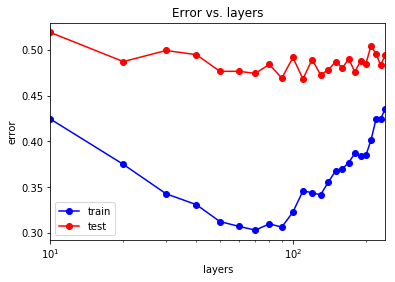

In [159]:
plt.semilogx(layers_arr, train_err, 'b-o', label = 'train', color='blue')
plt.semilogx(layers_arr, test_err, 'r-o', label = 'test', color='red')
plt.xlim([np.min(layers_arr),np.max(layers_arr)])
plt.title('Error vs. layers')
plt.xlabel('layers')
plt.ylabel('error')
plt.legend()
plt.show();

In [160]:
best_layers = layers_arr[test_err == np.min(test_err)]
print(best_layers)

[110]


Нейронная сеть при найденном  оптимальном количестве нейронов

In [161]:
mlp_model = MLPClassifier(hidden_layer_sizes = best_layers,
                          solver = 'lbfgs', activation = 'logistic', random_state = 2)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.3259109311740891
0.48558421851289835


#### Подбор alpha при оптимальном количестве нейронов

In [162]:
alpha_arr = np.linspace(0.0001, 0.1, 60)
test_err = []
train_err = []
for alp in alpha_arr:
    mlp_model = MLPClassifier(alpha = alp, hidden_layer_sizes = best_layers,
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

alpha_opt = alpha_arr[test_err == min_test_err]
print("Оптимальное значение alpha = {}".format(alpha_opt))

0.31781376518218624 0.4575113808801214
Оптимальное значение alpha = [0.07290847]


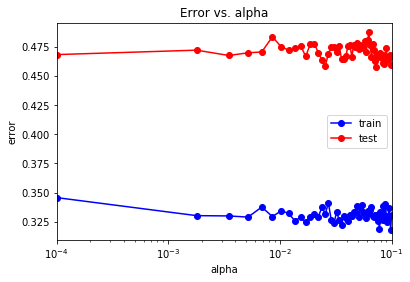

In [163]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train', color='blue')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test', color='red')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
plt.show()

Значения ошибок при оптимальных параметрах

In [164]:
print(np.min(train_err), np.min(test_err))

0.31781376518218624 0.4575113808801214


Мы получили ожидаемые результаты, приблизительно похожие на полученные результаты в первой части работы.
Стоит заметить, что исходя из полученных выше графиков можно сделать вывод о том, что переобучение отсутствует, так как не происходит подгонки по обучающему набору. На них не отражен такой момент, когда бы ошибка на обучающей выборке продолжала  падать, а на тестовой - расти. 

### Нейронная сеть с двумя скрытыми слоями

In [165]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,50), alpha = alpha_opt[0],
                          solver = 'lbfgs', activation = 'logistic', random_state = 43)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
train_err = np.mean(y_train != y_train_pred)
test_err = np.mean(y_test != y_test_pred)
print(train_err)
print(test_err)

0.33780364372469635
0.47192716236722304


#### Подбор параметров

#### Нахождение оптимального колличества нейронов

In [166]:
layers_arr = [(x, y) for x in range(50, 250, 20) for y in range(50, 250, 20)]
test_err = []
train_err = []
n_number = []
for n in layers_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n, alpha = alpha_opt[0],
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    n_number.append(n)

In [167]:
min_test_err = np.min(test_err)
best_layers_arr = [n_number[i] for i in range(0, len(n_number)) if test_err[i] == min_test_err]
print("Оптимальное количество нейронов = {}".format(best_layers_arr))

Оптимальное количество нейронов = [(70, 70), (110, 50)]


In [168]:
min_train_err = np.min(train_err)
print(min_train_err, min_test_err)

0.33451417004048584 0.4650986342943854


#### Подбор alpha при оптимальном количестве нейронов

In [182]:
alpha_arr = np.linspace(0.0001, 0.1, 60)
test_err = []
train_err = []
for alp in alpha_arr:
    mlp_model = MLPClassifier(alpha = alp, hidden_layer_sizes = best_layers_arr[0],
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

alpha_opt_arr = alpha_arr[test_err == min_test_err]
print("Оптимальное значение alpha = {}".format(alpha_opt_arr))

0.3476720647773279 0.4582701062215478
Оптимальное значение alpha = [0.06782881]


### Итоговая модель

Оптимальное значение слоев
Мы получили, что нейронная сеть с двумя скрытыми слоями имет немного меньшую точность, чем нейронная сеть с одним слоем
Поэтому для прогонки на тестовых данных мы будем использовать один скрытый слой

In [221]:
mlp_model = MLPClassifier(hidden_layer_sizes = best_layers[0], alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 13)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.3309716599190283
0.4575113808801214


In [222]:
data_test = pd.read_csv('test.csv', sep = ',', header=None, engine = 'python')
data_test.shape

(1530, 57)

In [223]:
data_test.columns = [u's1',u's2',u's3',u's4',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'h1', u'h2', u'h3', u'h4', u'h5',u'h6']

In [224]:
def getH(lst):
    index=-1
    for i in range(0,len(lst)):
        if lst[i] == 1:
            index=i+1
    if(index==6):
        return 0
    return index

In [225]:
data_test['H']=0
for i in range(0,len(data_test)):
    data_test['H'][i]=getH([data_test.h1[i],data_test.h2[i],data_test.h3[i],data_test.h4[i],data_test.h5[i],data_test.h6[i]])

D:\Anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
data_test = data_test.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_test = data_test.drop(['s4','d19','d4','d31','d25','d35','d27'],axis=1)
data_test.shape

(1530, 45)

In [227]:
real_class = data_test['H']
data_test = data_test.drop(['H'],axis=1)

In [228]:
error_test_data  = np.mean(real_class  != mlp_model.predict(data_test))
error_test_data

0.3803921568627451

В итоге получили ошибку больше, чем в первой части лабораторной работе

## Метрики качества

In [229]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[441  56  24  38  44  41]
 [ 34 113  29  27  37  15]
 [ 14  12  36   8  10   3]
 [ 24  17  11  68   9  24]
 [ 19  12   7   5  32  22]
 [  9  15   7  18  12  25]]


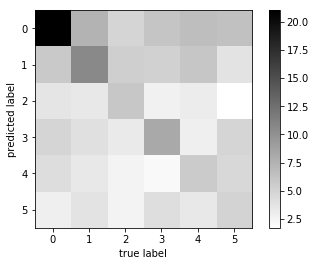

In [230]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(6))
plt.yticks(range(6))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
plt.show();

In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.68      0.82      0.74       541
          1       0.44      0.50      0.47       225
          2       0.43      0.32      0.37       114
          3       0.44      0.41      0.43       164
          4       0.33      0.22      0.27       144
          5       0.29      0.19      0.23       130

avg / total       0.51      0.54      0.52      1318



Количество неверно определенных подходящий для признаков эвристик

In [232]:
err_number = 0
num=0
for i in range(N_test):
    features = X_test[i:i+1]
    cls = y_test[i:i+1]
    cls_pred = mlp_model.predict(features)
    num+=1
    if cls_pred[0] != cls.values[0]:
        err_number +=1

In [233]:
print("Неверно определено ",err_number," из ", N_test)

Неверно определено  603  из  1318


### Вывод

По проделанной работе можно сделать следующий вывод: предоставленных данных оказалось недостаточно, или же они оказались протеворечивыми (признаки могли быть практически одинаковыми(незначительно отличающимися друг от друга), однако по данным признакам разные эвристики показали наилучший результат). 

Также следует заметить, что имеется сильный перевес объектов с нулевым классом, поэтому достигнутые результаты возможно могут быть улучшены, но это не точно, путем добавления новых элементов, чтобы объектов каждого класса было примерно равное количество.

Одна из возможных причин плохо обученного классификатора может быть не верно подобранные веса. Особым свойством нейронных сетей является то, что их веса задаются случайным образом перед началом обучения и случайная инициализация влияет на процесс обучения модели. Это означает, что даже при использовании одних и тех же параметров мы можем получить очень разные модели, задавая разные стартовые значения генератора псевдослучайных чисел.

In [234]:
rand = np.arange(13,250,5)
score_train=[]
score_test=[]
for r in rand:
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = best_layers[0], solver = 'lbfgs',
                          activation = 'logistic', random_state = r)
    mlp_model.fit(X_train, y_train)
    score_train.append(mlp_model.score(X_train, y_train))
    score_test.append(mlp_model.score(X_test, y_test))

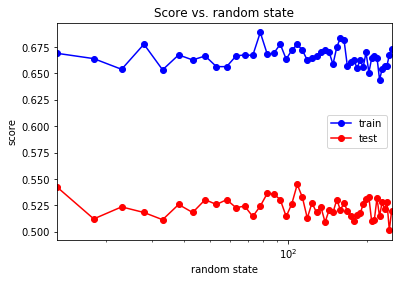

In [235]:
plt.semilogx(rand, score_train, 'b-o', label = 'train')
plt.semilogx(rand, score_test, 'r-o', label = 'test')
plt.xlim([np.min(rand), np.max(rand)])
plt.title('Score vs. random state')
plt.xlabel('random state')
plt.ylabel('score')
plt.legend()
plt.show();

In [236]:
rand[score_test == np.max(score_test)]

array([108])

In [237]:
1-np.max(score_test)

0.45523520485584223